In [5]:
# Import necessary packages here, e.g.
import numpy as np                 # for numerical operations
import matplotlib.pyplot as plt    # for plotting            
import pandas as pd                # for data manipulation
import xarray as xr                # for seeing the datasets
import cartopy.crs as ccrs         # for making the plot
import cartopy.feature as cfeature # for adding land and coastlines
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER # for formatting the longitude and lattitude
# Add other packages as needed, for example:
# import pandas as pd            # for data manipulation

# Phytoplankton populations and chlorophyll concentrations affects the ocean color


Aldrich Siwi

OCEAN 215 Final Project  
Autumn 2024

## Introduction

<!-- Include your motivation and any background information needed to understand your research question and data analysis. Clearly state your research question and hypothesis. -->


Phytoplankton, microscopic marine organisms, contain chlorophyll to perform photosynthesis, giving ocean water with high phytoplankton concentrations a greenish color. The seasonal and geographical fluctuations in phytoplankton populations and chlorophyll concentrations are fundamental to the changing color of the ocean. I want to research about this because it Interest me on how the ocean changes color from dark blue to green and I want to know does season/weather and geographic standings affects these Phenomenon. 



## Data sources:
<!-- List each data source used in your project. For each dataset, include: 
     - Where you accessed it from 
     - Date you accessed/downloaded it 
     - Data collection process
     - Relevant variables (including unit) 
     - Spatial and temporal coverage and resolution 
     - Description of any obstacles or challenges you faced in obtaining the dataset
     - URL to the dataset if available -->

- Phytoplankton bloom or population
  - Downloaded from Nature.com, 2024-10-18
  - Data collection process: The dataset was derived using global, 1-km resolution daily observations from the Moderate Resolution Imaging Spectroradiometer (MODIS) onboard NASA's Aqua satellite, and all 0.76 million images acquired by this satellite mission between 2003 and 2020 were used. 
  - Relevant variables included: 
    - Year (2003 - 2020)
    - Bloom frequency (×10^3)
  - Spatial coverage and resolution: global, 1-km resolution daily observations
  - Obstacles to data access: Data is not in the data availability section, but it's in the source data for the Figure 1.
  - Temporal coverage and resolution: Yearly, 2003-2020
  - URL to dataset: https://www.nature.com/articles/s41586-023-05760-y#Sec16. (the source data Fig 1.)
<br>
- Chlorophyl Concentration
  - Downloaded from Neo NASA Earth Observation on January 2018 and June 2018, 2024-12-03
  - Data collection process: The dataset collected by using the MODIS instrument aboard NASA's Terra and Aqua satellites measures ocean color every day
  - Relevant variables included: 
    - Year (2018)
    - Latitude
    - Longitude 
    - Chlorophyll Concentration (mg/m^3)
  - Spatial coverage and resolution: global, 1-km resolution daily observations
  - Obstacles to data access: I need two datasets for both January and June of 2018
  - Temporal coverage and resolution: daily, cloud-free ocean pixels
  - URL to dataset: https://neo.gsfc.nasa.gov/view.php?datasetId=MY1DMM_CHLORA&year=2018 (slide the bar to get the January and June datasets)

## 1. anaylizing Phytoplankton Bloom Over time

<!-- In this cell, introduction the data set(s) you are working with, specify which aspect of your research question this section addresses, and describe the figure you will produce. -->

This figure is to see whether during 2018 is the bloom of Phytoplankton high or low considering that my question does the population of phytoplankton and chlorophyll concentration affects the ocean color and does seasons and geographycally affects that as well. This figure is to figure out for the phytoplanktons population. This will use the datasets of the phytoplankton bloom and I will use the year and Bloom frequency for the graph. 

In [14]:
# load data file(s)
phyto_url = '41586_2023_5760_MOESM6_ESM.xlsx'
# as part of commenting your code throughout this section, discuss any problems you encountered and how you solved them

In [18]:
# perform data cleaning steps
phyto = pd.read_excel(phyto_url) # read the excel file using panda

In [19]:
# perform data analysis
display(phyto) # display the data

,Year,Bloom frequency (×10^3),Affected area (×10^6 km2)
0,2003,1.542312,30.040338
1,2004,2.048246,30.383968
2,2005,2.042923,30.805537
3,2006,1.734683,31.178853
4,2007,1.706374,30.784207
5,2008,1.663116,31.793613
6,2009,1.490777,31.112409
7,2010,1.808170,31.635671
8,2011,1.509494,30.290093
9,2012,1.663117,31.462954


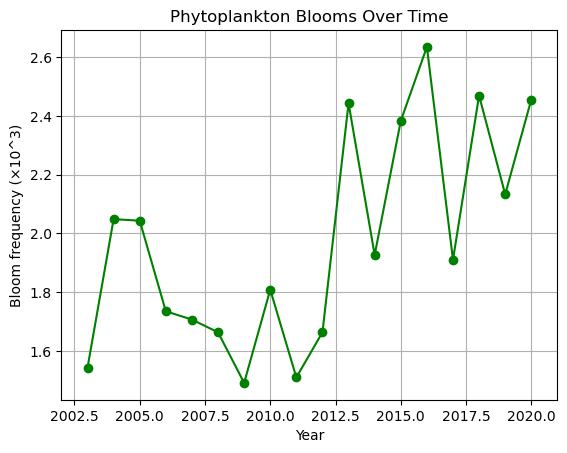

In [21]:
# make and display the first figure
# plot 
fig, axs = plt.subplots()
# set the x and y axis
x = phyto['Year']
y = phyto['Bloom frequency (×10^3)']
# have the marker and color
axs.plot(x, y, marker='o', c='green')
# title
axs.set_title('Phytoplankton Blooms Over Time')
# set the x limit
axs.set_xlim(2002, 2021)
# set the x and y label
axs.set_xlabel('Year')
axs.set_ylabel('Bloom frequency (×10^3)')
# show grid
axs.grid()

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Phytoplankton Blooms Over Time:** This graph helps me address that during 2018, the population of the phytoplankton are still considered high compare to the previous years. Then, I used a research figure that shows during 2018 the sea color was green and this helps prove that the population of phytoplankton does help affect the ocean color. 

## 2. Chlorophyll Concentration January 2018

<!-- In the introduction below, specify the data set(s) you are working with in this section, which aspect of your research question this section addresses, and the figure you will produce -->

The datasets that I would be using for this graph would be January of 2018 Chlorophyll concentration. I would be using the latitude, longitude, and concentration for this visualization. This is for helping me to see does season and geographic background affects the sea color or not. I will be using this graph to compare it to the June 2018 graph.

In [29]:
# if a new dataset, load data and perform data cleaning steps
chloro_Jan_url = 'AQUA_MODIS.20180101_20180131.L3m.MO.CHL.chlor_a.9km.nc'
# otherwise, continue to data analysis and figure creation
chl_jan = xr.open_dataset(chloro_Jan_url)
display(chl_jan)

## I open the datasets to see what variable they use to label the concentration, latitude, and longitude. 

<xarray.Dataset>
Dimensions:  (lat: 2160, lon: 4320, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 89.96 89.88 89.79 89.71 ... -89.79 -89.88 -89.96
  * lon      (lon) float32 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    chlor_a  (lat, lon) float32 ...
    palette  (rgb, eightbitcolor) uint8 ...
Attributes: (12/62)
    product_name:                     AQUA_MODIS.20180101_20180131.L3m.MO.CHL...
    instrument:                       MODIS
    title:                            MODISA Level-3 Standard Mapped Image
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    source:                           satellite observations from MODIS-Aqua
    ...                               ...
    cdm_data_type:                    grid
    keywords:                         Earth Science > Oceans > Ocean Chemistr...
    keywords_vocabulary:              NASA Global Change Master Directory (GC...
    data_bins:                        4722118
    data_minimum:                     0.0010523704
    data_maximum:                     84.74664

In [30]:
# perform data analysis
# values
lat = chl_jan['lat'].values
lon = chl_jan['lon'].values
chl_vals = chl_jan['chlor_a'].values

# For data cleaning I get the values and set them in a new variable so it will be easier for me to access. 

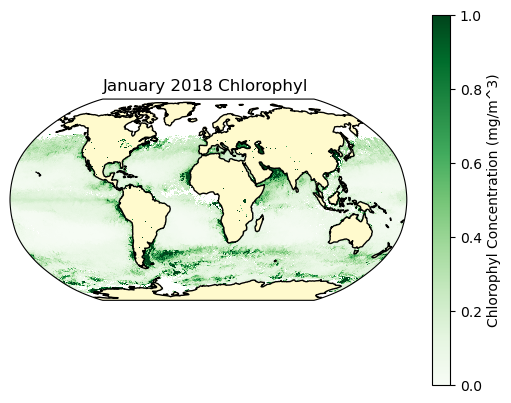

In [28]:
# make and display figure
# January plot
fig = plt.figure()
# A Robinson projection
ax = plt.axes(projection=ccrs.Robinson())
# color mapping with the variables, color map, vmin, and vmax
plt.pcolormesh(lon, lat, chl_vals, cmap='Greens', 
            transform=ccrs.PlateCarree(), vmin=0, vmax=1)

# adding the coastlines with low resolution and the color black
ax.coastlines(resolution='110m', color='black')
# adding land feature
ax.add_feature(cfeature.LAND, color='lemonchiffon')
# colorbar and title
c = plt.colorbar()
plt.title('January 2018 Chlorophyl ')
# set cbar lable 
c.set_label("Chlorophyl Concentration (mg/m^3)")

<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Chlorophyll Concentration January 2018:** This graph is to compare with the June graph seeing how January is considered as Winter and there is a clear difference seeing how the chlorophyll concentration are low compare to June. This proves my hypothesis that seasons/weather does actually affects the sea color and geographically seeing how the countries that have a tropical climate doesn't change the concentration that much because they have only two seasons and it's usually the same temperature. 

## 3. Chlorophyll Concentration June 2018

<!-- In the introduction below, specify the data set(s) you are working with in this section, which aspect of your research question this section addresses, and the figure you will produce -->

The datasets that I would be using for this graph would be June of 2018 Chlorophyll concentration. I would be using the latitude, longitude, and concentration for this visualization. This is for helping me to see does season and geographic background affects the sea color or not. I will be using this graph to compare it to the January 2018 graph.

In [33]:
# if a new dataset, load data and perform data cleaning steps
chloro_June_url = 'AQUA_MODIS.20180601_20180630.L3m.MO.CHL.chlor_a.9km.nc'
# otherwise, continue to data analysis and figure creation
chl_june = xr.open_dataset(chloro_June_url)
display(chl_june)

## I open the datasets to see what variable they use to label the concentration, latitude, and longitude. 

<xarray.Dataset>
Dimensions:  (lat: 2160, lon: 4320, rgb: 3, eightbitcolor: 256)
Coordinates:
  * lat      (lat) float32 89.96 89.88 89.79 89.71 ... -89.79 -89.88 -89.96
  * lon      (lon) float32 -180.0 -179.9 -179.8 -179.7 ... 179.8 179.9 180.0
Dimensions without coordinates: rgb, eightbitcolor
Data variables:
    chlor_a  (lat, lon) float32 ...
    palette  (rgb, eightbitcolor) uint8 ...
Attributes: (12/62)
    product_name:                     AQUA_MODIS.20180601_20180630.L3m.MO.CHL...
    instrument:                       MODIS
    title:                            MODISA Level-3 Standard Mapped Image
    project:                          Ocean Biology Processing Group (NASA/GS...
    platform:                         Aqua
    source:                           satellite observations from MODIS-Aqua
    ...                               ...
    cdm_data_type:                    grid
    keywords:                         Earth Science > Oceans > Ocean Chemistr...
    keywords_vocabulary:              NASA Global Change Master Directory (GC...
    data_bins:                        3828902
    data_minimum:                     0.005519067
    data_maximum:                     86.078896

In [34]:
# perform data analysis
# values
lat = chl_june['lat'].values
lon = chl_june['lon'].values
chl_vals = chl_june['chlor_a'].values

# For data cleaning I get the values and set them in a new variable so it will be easier for me to access. 

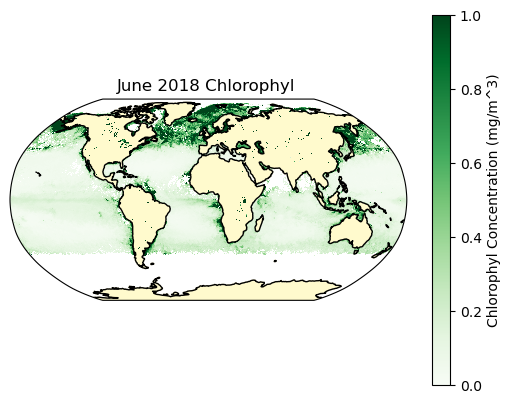

In [35]:
# make and display figure
# June plot
fig = plt.figure()
# A Robinson projection
ax = plt.axes(projection=ccrs.Robinson())
# color mapping with the variables, color map, vmin, and vmax
plot = plt.pcolormesh(lon, lat, chl_vals, cmap='Greens', 
            transform=ccrs.PlateCarree(), vmin=0, vmax=1)

# adding the coastlines with low resolution and the color black
ax.coastlines(resolution='110m', color='black')
# adding land feature
ax.add_feature(cfeature.LAND, color='lemonchiffon')
# colorbar and title
c = plt.colorbar()
plt.title('June 2018 Chlorophyl ')
# set cbar lable 
c.set_label("Chlorophyl Concentration (mg/m^3)")


<!-- Describe how this figure helps address your research question. What patterns or insights can you observe? -->
**Chlorophyll Concentration June 2018:** This graph is to compare with the January graph seeing how June is considered as Summer and there is a clear difference seeing how the chlorophyll concentration are high compare to January. This proves my hypothesis that seasons/weather does actually affects the sea color and geographically seeing how the countries that have a tropical climate doesn't change the concentration that much because they have only two seasons and it's usually the same temperature. 

## Discussion
**Interpretation of Results:**  *(Write ~1 paragraph below)*
<!-- Summarize what you learned from each data analysis section/figure. Discuss key insights and conclusions regarding your research question. Do your results support or contradict your hypothesis? -->
My results shows that it does support my hypothesis because it shows that during winter the chlorophyll concentration are low and high in the summer meaning that seasons affect the ocean color and geographically it also affect because the countries that have a tropical climate only has two seasons and the season is usually the same, but one of them rains more often. 

**Limitations and Future Work:**  *(Write ~1 paragraph below)*
<!-- Identify limitations in your analysis. Discuss any factors that may have impacted the validity or reliability of your results (e.g., data quality, sample size, assumptions). -->
<!-- What next steps could you or another researcher take to continue investigating this research question? Suggest ideas for further research, data collection, or alternative methodologies that could enhance understanding of the topic. -->
I think the limitations for this data is that, it's not complete and the data that I have for the phytoplankton bloom aren't that good. It would be better to get some much better data on the phytoplankton during that specific timeframe like in January and June, so it can support or contradict better with my hypothesis. 

For future work, it could be does natural disasters like tsunami or whirpools affects this as well or not. It can also be does the affect of global warming like the ice metls affect the ocean color or not. I think it's a topic that I could see on or interested in. 

## References  

1. Dai, Yanhui, et al. “Coastal Phytoplankton Blooms Expand and Intensify in the 21st Century.” Nature, vol. 615, no. 615, 1 Mar. 2023, pp. 1–5, www.nature.com/articles/s41586-023-05760-y#Sec3, https://doi.org/10.1038/s41586-023-05760-y.

2. “Ocean Colour - EoPortal.” Eoportal.org, 2024, www.eoportal.org/other-space-activities/ocean-colour. Accessed 7 Dec. 2024.

